<a href="https://colab.research.google.com/github/rdiazg14/STATS/blob/main/ANALISIS_FACTORIAL_TEST_EVALUACION_PERSONALIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Factorial en proyecto de evaluación de la personalidad**

**Los datos utilizados provienen de la Evaluación de la personalidad (SAPA) que contiene 25 preguntas de autoevaluación personal.**

SAPA, Evaluación de la personalidad de apertura sintética , es un método utilizado para evaluar las diferencias de personalidad individual, ampliamente utilizado para las encuestas en línea.

El sujeto evaluado recibe un subconjunto aleatorio de los elementos en estudio con el fin de recopilar un gran volumen de datos suficientes para ensamblar grandes matrices de covarianza (de la relación entre los datos verificados).

La prueba en línea fue desarrollada por William Revelle y es mantenida por la Universidad Northwestern, Illinois, EE. UU.

La escala de respuesta utilizada fue:
1. Completamente falso
2. Moderadamente falso
3. Un poco falso
4. Un poco correcto
5. Moderadamente correcto
6. Completamente correcto

Un marco de datos con 2800 observaciones sobre las siguientes 28 variables.

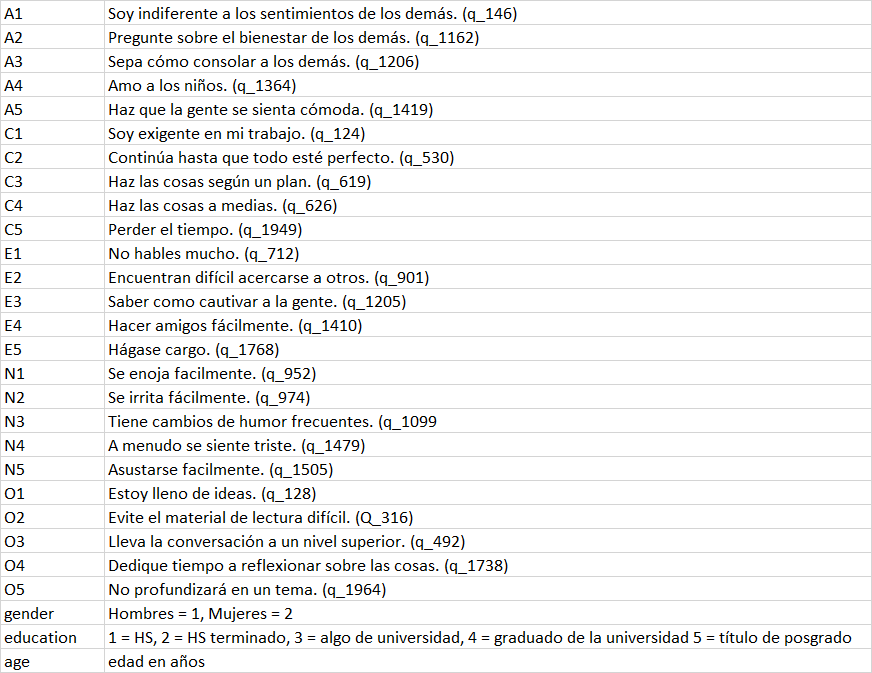

In [ ]:
#Instalación del módulo factor_analyzer
!pip install factor_analyzer

# Importando las librerias
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from bokeh.plotting import figure, output_notebook, show


In [ ]:
# Leyendo el archivo de datos
!wget -O bfi.csv http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv

--2021-07-30 03:26:50--  http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv
Resolving www-eio.upc.edu (www-eio.upc.edu)... 147.83.24.219
Connecting to www-eio.upc.edu (www-eio.upc.edu)|147.83.24.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182884 (179K) [text/csv]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>] 178.60K   356KB/s    in 0.5s    

2021-07-30 03:26:51 (356 KB/s) - ‘bfi.csv’ saved [182884/182884]



In [ ]:
# guardar los datos en un dataframe
df = pd.read_csv('bfi.csv')

# Renombar el nombre de la primera columna
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 

print ( 'La tabla importada contiene %d filas, %d columnas' %df.shape ) 
print ( '\nque contiene las siguientes columnas: \n\n' , df.columns ) 

La tabla importada contiene 2800 filas, 29 columnas

que contiene las siguientes columnas: 

 Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3',
       'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')


In [ ]:
# Mostrando las 10 primera filas de la data:
df.head()

,id,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [ ]:
# La tabla tiene cambios asociados a datos demográficos que son ID, género, educación y edad 
dfDemografico = df[['id', 'gender', 'education', 'age']]

# Las columnas innecesarias se eliminan de df
df.drop(['id', 'gender', 'education', 'age'],axis=1,inplace=True)

# Se eliminan las filas que no contienen datos
df.dropna(inplace=True)

# Mostrando las nuevas 10 primera filas de la data:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
# Descripción general de los datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [ ]:
# Convertimos el campo O2 en flotante
df['O2'] = df['O2'].astype(np.float64)

type(df['O2'][0])    # Ahora el campo es de tipo numpy.float64

numpy.float64

In [ ]:
# se guarda el nombre de las cabeceras de cada columna en la variable columnas

columnas=df.columns
print(columnas)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')


In [ ]:
# La matriz de correlación entre todas las respuestas de la tabla sería:
corrMatriz = df.corr()

# Ver solo las correlaciones entre las variables del grupo A
corrMatriz[["A1", "A2","A3", "A4","A5"]].head(5)

,A1,A2,A3,A4,A5
A1,1.000000,-0.350905,-0.273636,-0.156754,-0.192698
A2,-0.350905,1.000000,0.503041,0.350856,0.397400
A3,-0.273636,0.503041,1.000000,0.384918,0.515679
A4,-0.156754,0.350856,0.384918,1.000000,0.325644
A5,-0.192698,0.397400,0.515679,0.325644,1.000000


In [ ]:
# Ver solo las correlaciones de todas las respuestas
df.corr()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000000,-0.350905,-0.273636,-0.156754,-0.192698,0.014698,0.012918,-0.020587,0.115074,0.038293,0.107178,0.087922,-0.048913,-0.069781,-0.020182,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,-0.063788,-0.090512,0.099166
A2,-0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,-0.146295,-0.121106,-0.222280,-0.243084,0.255066,0.297125,0.294191,-0.093627,-0.050476,-0.040407,-0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,-0.080838
A3,-0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,-0.121116,-0.153811,-0.210366,-0.291863,0.383131,0.387630,0.253463,-0.083266,-0.092473,-0.039158,-0.127107,-0.040143,0.150086,0.006588,0.226333,0.032267,-0.041750
A4,-0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,-0.172271,-0.249675,-0.133600,-0.209979,0.204377,0.318935,0.168873,-0.106645,-0.155289,-0.073887,-0.171228,-0.015136,0.057075,0.037763,0.070983,-0.049793,0.027308
A5,-0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,-0.125531,-0.167036,-0.252310,-0.338485,0.411831,0.482558,0.268616,-0.204765,-0.198836,-0.138472,-0.215346,-0.081404,0.162596,-0.006988,0.238191,0.011354,-0.050449
C1,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,-0.362491,-0.261079,-0.030506,-0.106797,0.134767,0.153208,0.267829,-0.071954,-0.038180,-0.025476,-0.098035,-0.047970,0.179249,-0.129263,0.196562,0.100189,-0.130471
C2,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,-0.396090,-0.303820,0.017052,-0.075232,0.152957,0.122901,0.257836,-0.019951,-0.005586,0.003189,-0.044341,0.051212,0.161042,-0.057347,0.192681,0.047427,-0.066590
C3,-0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,-0.357824,-0.350949,-0.009045,-0.089244,0.092564,0.099537,0.207488,-0.079093,-0.066880,-0.077416,-0.122175,-0.023508,0.091141,-0.029604,0.058880,0.011360,-0.002809
C4,0.115074,-0.146295,-0.121116,-0.172271,-0.125531,-0.362491,-0.396090,-0.357824,1.000000,0.487551,0.098480,0.207823,-0.084545,-0.112542,-0.235012,0.215852,0.158346,0.201905,0.270633,0.197062,-0.093561,0.208072,-0.083027,0.053014,0.189543
C5,0.038293,-0.121106,-0.153811,-0.249675,-0.167036,-0.261079,-0.303820,-0.350949,0.487551,1.000000,0.067669,0.266361,-0.163258,-0.207217,-0.234834,0.216414,0.246298,0.241599,0.354664,0.179009,-0.085630,0.122596,-0.074129,0.135482,0.055804


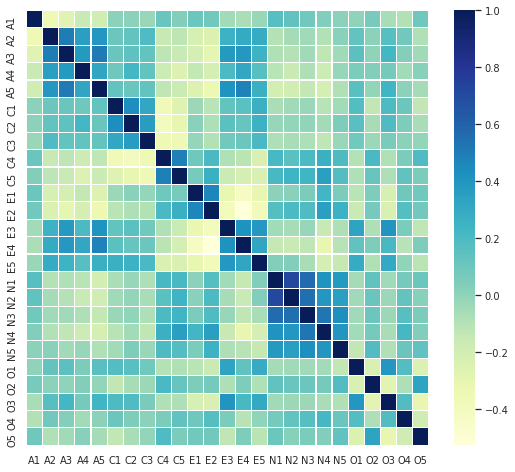

In [ ]:
#Visualizamos una matriz de correlación de los datos

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(df.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
# usando la funcion para la prueba de Bartlett

chi_square_value, p_value = calculate_bartlett_sphericity(df)
print('Prueba de esfericidad de Bartlett: chi² = %d , p_value = %d' % (chi_square_value, p_value))

Prueba de esfericidad de Bartlett: chi² = 18170 , p_value = 0


In [ ]:
# Usaremos la funcion calculate_kmo
kmo_all,kmo_model = calculate_kmo(df)

print('Valores de kmo_all =\n', kmo_all, '\n')
print('KMO =', kmo_model)

Valores de kmo_all =
 [0.75391928 0.8363196  0.87010963 0.87795367 0.90348747 0.84325413
 0.79568263 0.85186857 0.82647206 0.86401687 0.83801873 0.88380544
 0.89697008 0.87731273 0.89332158 0.77933902 0.78025018 0.86229919
 0.88518467 0.86014155 0.85858672 0.78019798 0.84434957 0.77003158
 0.76144469] 

KMO = 0.8485397221949221


In [ ]:
# Creamos el objeto factor_analysis, sin rotación y usando 5 factores (tentativamente)
fa = FactorAnalyzer(5, rotation=None)

# Aplicamos el método de ajuste de este objeto al marco de datos
fa.fit(df)

# Después de este ajuste podemos recolectar los autovectores y autovalores
ev, v = fa.get_eigenvalues()
print('Son ' + str(len(ev)) + ' autovalores:\n', ev)

Son 25 autovalores:
 [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902]


In [ ]:
#Trazamos una curva con los autovalores de mayor a menor

output_notebook()

eixoX = range(1, len(ev)+1)   # de 1 0 26
eixoY = ev
p = figure(title="Scree Plot", x_axis_label='n-ésimo autovalor',y_axis_label='autovalor',
           x_range=[0,25], y_range=(0, 6), plot_width=600, plot_height=400,
           background_fill_color="#c9b2dd")

p.line(eixoX, eixoY, line_width=1, color = 'black')
p.circle(eixoX, eixoY, size=8, fill_color='red', color="black")

show(p)

In [ ]:
# 6 factores
fa = FactorAnalyzer( 6, rotation="varimax")

# el objeto tiene el método de ajuste para el análisis de marcos de datos 
fa.fit(df)

# De esto extraemos las cargas factoriales (cargas factoriales) 
# Tenga en cuenta que fa.loadings_ es un numpy.array con forma (25,6).
# Usamos el método pd.DataFrame.from_records 
# de pandas para convertirlo en un  dataframe

factorLoadings = pd.DataFrame.from_records(fa.loadings_)

# Para ver a dataframe generado:
factorLoadings.head()

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519


In [ ]:
# Reemplazamos las líneas con los nombres de los elementos
factorLoadings.index=columnas

# Cambiamos el nombre de las columnas
factorLoadings.rename(columns = {0:'Factor 1',
                                 1:'Factor 2',
                                 2:'Factor 3',
                                 3:'Factor 4',
                                 4:'Factor 5',
                                 5:'Factor 6'}, inplace = True)

# Mostramos el resultado
factorLoadings

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


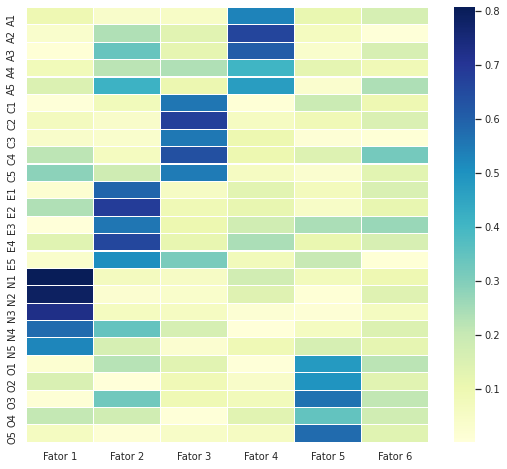

In [ ]:
#Visualizamos una matriz de calor con las cargas factoriales
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(factorLoadings.abs(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
#Visualizamos una matriz de calor con las cargas factoriales con otro gráfico
factorLoadings.style.background_gradient(cmap='coolwarm')

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [ ]:
# Rehaciendo el cálculo con solo 5 factores 
# Eliminamos la variable fa
del fa

fa = FactorAnalyzer( 5, rotation="varimax")
fa.fit(df)
factorLoadings = pd.DataFrame.from_records(fa.loadings_)

# Renombra elementos
factorLoadings.index=columnas

# Renombrando las columnas (fatores)
factorLoadings.rename(columns = {0:'Factor 1',
                                 1:'Factor 2',
                                 2:'Factor 3',
                                 3:'Factor 4',
                                 4:'Factor 5'}, inplace = True)

# Mostrar resultados
factorLoadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [ ]:
factorLoadings =factorLoadings.abs()

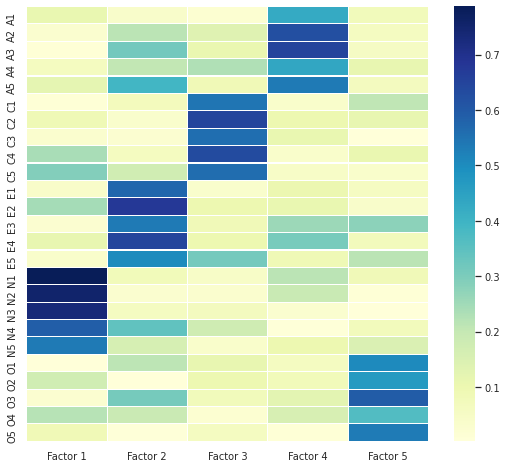

In [ ]:
#Visualizamos una matriz de calor con las cargas factoriales
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(factorLoadings.abs(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
#Visualizamos una matriz de calor con las cargas factoriales con otro gráfico
factorLoadings.style.background_gradient(cmap='coolwarm')

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [ ]:
# Se renombra el nombre de las columnas con el nombre de los factores macros de la encuesta
factorLoadings.rename(columns = {'Factor 1':'Neuroticismo',
                                 'Factor 2':'Extroversión',
                                 'Factor 3':'Conciencia',
                                 'Factor 4':'Amabilidad',
                                 'Factor 5':'Apertura'}, inplace = True)

# Muestra el resultado
factorLoadings.head()	

,Neuroticismo,Extroversión,Conciencia,Amabilidad,Apertura
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708


In [ ]:
# obtenermos los puntos en comun o la comunidades
fa.get_communalities()

array([0.20390517, 0.46280338, 0.53969218, 0.30190473, 0.47002029,
       0.34839471, 0.45387181, 0.32428892, 0.47669925, 0.43538283,
       0.34780932, 0.54550199, 0.44105495, 0.54125654, 0.40714621,
       0.68139838, 0.60800298, 0.54447487, 0.50580329, 0.34931563,
       0.31733902, 0.2674515 , 0.47464268, 0.2460347 , 0.29628368])

In [ ]:
# suma de los puntos en común
fa.get_communalities().sum()

10.590479025334046

In [ ]:
# Mostrar cada variable con su puntaje
dfComunidades = pd.DataFrame(factorLoadings)
dfComunidades.index = columnas
dfComunidades

,Neuroticismo,Extroversión,Conciencia,Amabilidad,Apertura
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


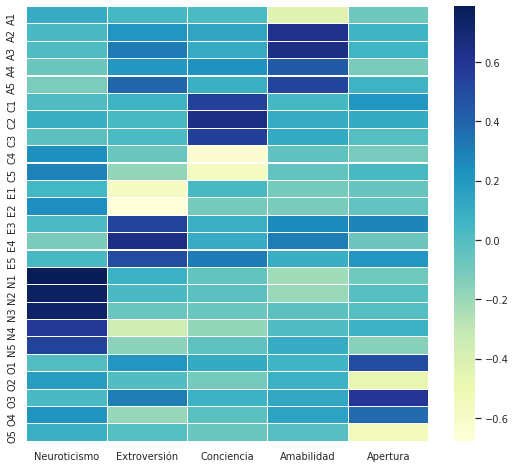

In [ ]:
# Mapa de Calor para los valores finales de los puntos en comun
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(dfComunidades, ax = ax, cmap ="YlGnBu", linewidths = 0.1)